## Principal Component Analysis on the output of SOM cells

In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def load_images_from_folder(folder, width, height):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            img = cv2.imread(os.path.join(folder,filename))
            img = cv2.resize(img, (width, height))
            if img is not None:
                images.append(img)
    return images

def pca_visualize(folder, width, height):
    # load images
    all_images = load_images_from_folder(folder, width, height)
    
    # convert images to numpy array
    all_images = np.array(all_images)
    num_images, h, w, c = all_images.shape
    
    # flatten images to 1D vectors
    flattened_images = np.reshape(all_images, (num_images, h*w*c))
    
    # perform PCA
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(flattened_images)
    
    # plot images
    fig, ax = plt.subplots()
    fig.set_size_inches(100, 80)
    ax.set_aspect('equal')
    ax.tick_params(axis='both', labelsize=50)
    plt.xlim(transformed_data[:,0].min()-1, transformed_data[:,0].max()+1)
    plt.ylim(transformed_data[:,1].min()-1, transformed_data[:,1].max()+1)
    
    for i, (x,y) in enumerate(transformed_data):
        img = all_images[i]
        # convert image from BGR to RGB color space
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        im = ax.imshow(img, extent=[x-w*8, x+w*8, y-h*8, y+h*8], aspect='equal', cmap='gray')
         
    return fig



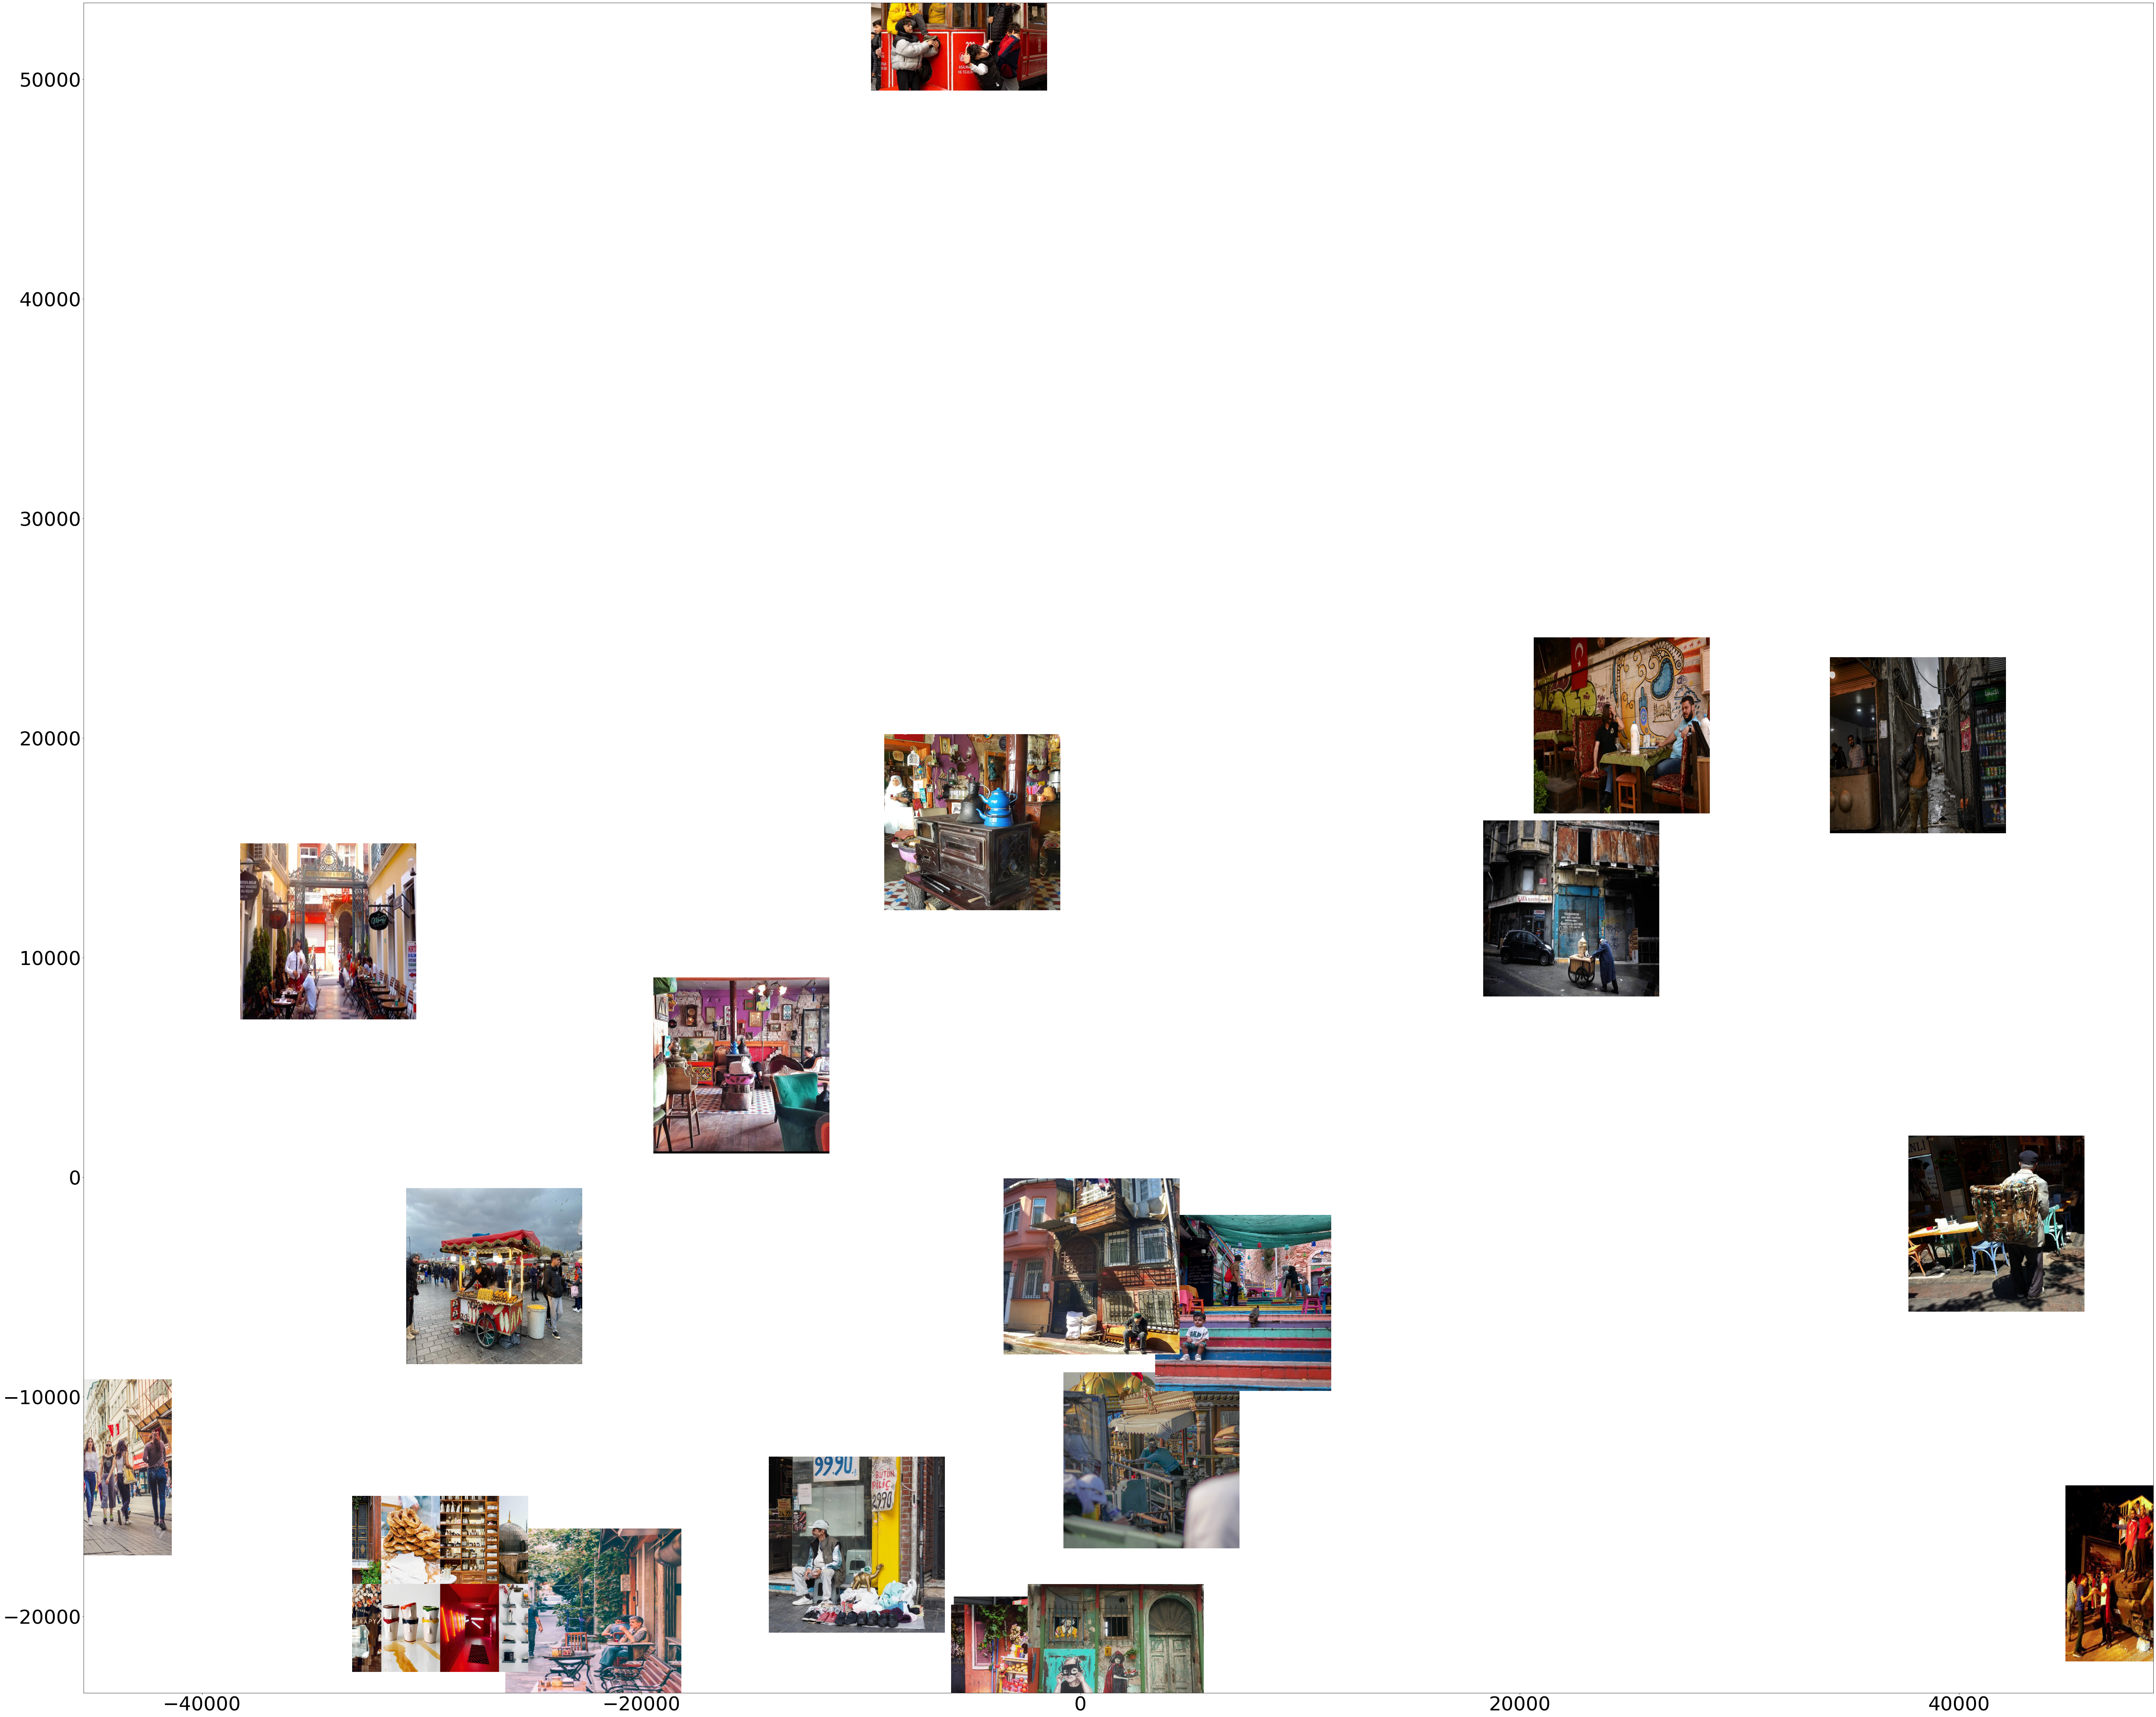

In [77]:
folder = '/Users/mansikothari/Documents/UD_MARCH/RC_11/Term_02/SOM(Google)/9_9'
width = 500
height = 500
fig = pca_visualize(folder, width, height)
plt.show()